# Iris Dataset

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

## 1. Hypothesis

In [19]:
# Import the important library for data preprocessing, Input-Output of dataset and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline
warnings.filterwarnings("ignore")

## 2. Loading data in Pandas Dataframe :

In [20]:
df = pd.read_csv('D:\june 3 -july 15\Project\iris-dataset-master\iris-species/Iris.csv').drop("Id", axis=1)
df.head(n=10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## 3. Plotting Graph :

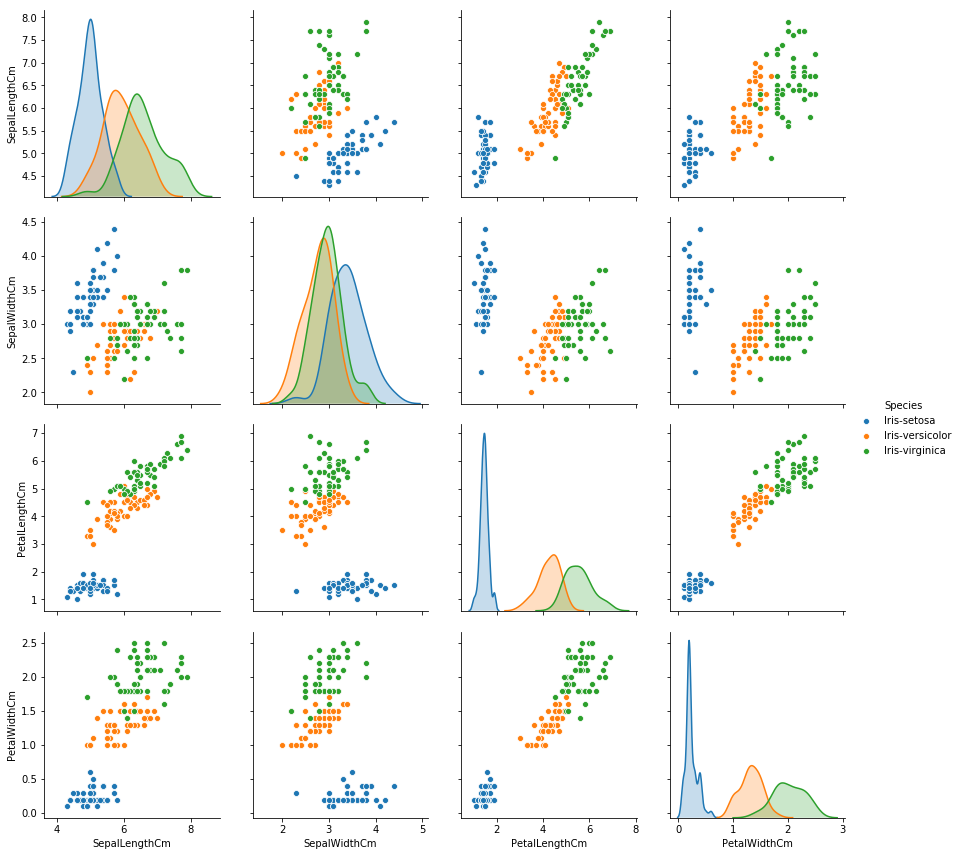

In [21]:
sns.pairplot(df, hue="Species", size=3, diag_kind="kde");

## 4. Feature Extraction and Test-Train-Split : 

In [22]:
df = df.replace(['Iris-versicolor','Iris-virginica','Iris-setosa'],[0, 1, 2])
X = df.drop("Species",axis=1)
y  = df["Species"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Initialize the three models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100)
D = KNeighborsClassifier(n_neighbors=3)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

## 6. Train and Test Models (Algorithms) :

In [26]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [27]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] = f1_score(y_test, y_pred,  average='micro') 
    print (pred_val[a])

0.96
0.98
0.9
0.98
0.98


## 7. Ploating Graph for better Visualization :

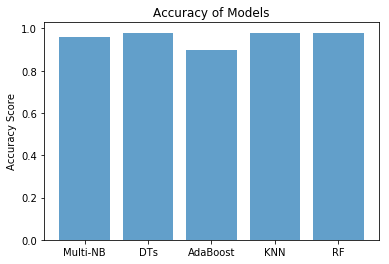

In [28]:
# ploating data for F1 Score
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()

## 8. Conclusion :

Best result is achived using Decision Trees classifier, Nearest Neighbors classifier and Random Forest classifier.